In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the excel file
df = pd.read_csv('../csv_files/CapstoneEDA.csv',index_col=0)
df.head(10)

,PTS,FGM,FGA,FGPerc,3PM,3PA,3PPerc,FTM,FTA,FTPerc,...,DREB,REB,AST,STL,BLK,TOV,PF,EFGPerc,FTR,Target
0,109,36,91,39.6,12,36,33.3,25,30,83.3,...,28,41,25,8,3,14,21,0.461538,0.329670,0
1,123,43,82,52.4,17,38,44.7,20,21,95.2,...,35,40,30,9,10,14,22,0.628049,0.256098,1
2,109,38,82,46.3,13,34,38.2,20,23,87.0,...,36,42,34,7,5,15,26,0.542683,0.280488,1
3,104,35,94,37.2,11,38,28.9,23,26,88.5,...,34,49,17,8,2,15,22,0.430851,0.276596,0
4,109,34,78,43.6,12,31,38.7,29,31,93.5,...,29,38,29,6,2,16,27,0.512821,0.397436,0
5,118,39,77,50.6,13,33,39.4,27,32,84.4,...,29,36,25,6,6,10,26,0.590909,0.415584,1
6,94,30,75,40.0,12,34,35.3,22,31,71.0,...,30,42,19,7,7,11,22,0.480000,0.413333,0
7,100,36,74,48.6,12,27,44.4,16,22,72.7,...,32,38,20,7,4,10,24,0.567568,0.297297,1
8,99,38,84,45.2,10,31,32.3,13,18,72.2,...,45,53,26,2,2,11,22,0.511905,0.214286,0
9,105,31,84,36.9,18,43,41.9,25,31,80.6,...,35,45,19,6,4,6,16,0.476190,0.369048,1


In [54]:
# Filtering out the Target Variable before working on the dataset
dfy = df.filter(['Target'], axis=1)

In [57]:
# Dropping the target variable from the dataset
df = df.drop(['Target'], axis=1) 

{'whiskers': [<matplotlib.lines.Line2D at 0x115f526a0>,
 'caps': [<matplotlib.lines.Line2D at 0x115f55048>,
 'boxes': [<matplotlib.lines.Line2D at 0x115f52550>],
 'medians': [<matplotlib.lines.Line2D at 0x115f55898>],
 'fliers': [<matplotlib.lines.Line2D at 0x115f55cc0>],
 'means': []}

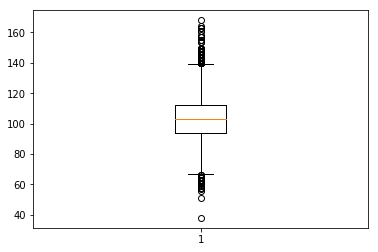

In [59]:
# Creating a box plot to detect outliers
plt.boxplot(df.PTS)

{'whiskers': [<matplotlib.lines.Line2D at 0x1161a4128>,
 'caps': [<matplotlib.lines.Line2D at 0x1161a49e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x116199f98>],
 'medians': [<matplotlib.lines.Line2D at 0x1161ab278>],
 'fliers': [<matplotlib.lines.Line2D at 0x1161ab6a0>],
 'means': []}

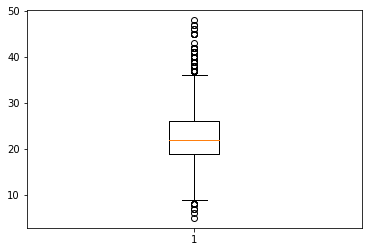

In [60]:
# Creating a box plot to detect outliers
plt.boxplot(df.AST)

{'whiskers': [<matplotlib.lines.Line2D at 0x116130b38>,
 'caps': [<matplotlib.lines.Line2D at 0x11613a438>,
 'boxes': [<matplotlib.lines.Line2D at 0x1161309e8>],
 'medians': [<matplotlib.lines.Line2D at 0x11613ac88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1161420f0>],
 'means': []}

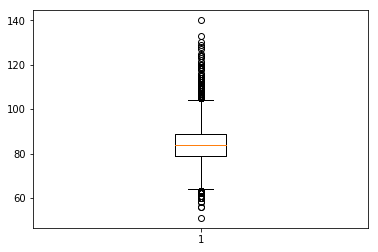

In [61]:
# Creating a box plot to detect outliers
plt.boxplot(df.FGA)

{'whiskers': [<matplotlib.lines.Line2D at 0x1162095c0>,
 'caps': [<matplotlib.lines.Line2D at 0x116209e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x116209470>],
 'medians': [<matplotlib.lines.Line2D at 0x115f93710>],
 'fliers': [<matplotlib.lines.Line2D at 0x115f93b38>],
 'means': []}

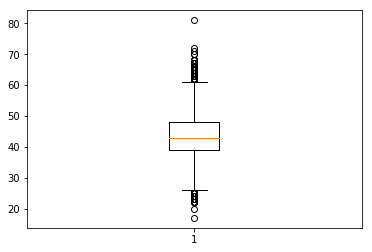

In [62]:
# Creating a box plot to detect outliers
plt.boxplot(df.REB)

{'whiskers': [<matplotlib.lines.Line2D at 0x116adb9b0>,
 'caps': [<matplotlib.lines.Line2D at 0x116ae62b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x116adb860>],
 'medians': [<matplotlib.lines.Line2D at 0x116ae6b00>],
 'fliers': [<matplotlib.lines.Line2D at 0x116ae6f28>],
 'means': []}

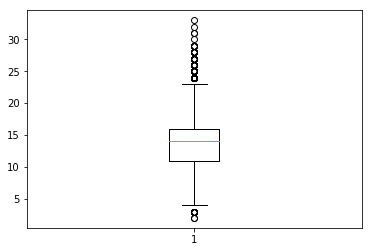

In [63]:
# Creating a box plot to detect outliers
plt.boxplot(df.TOV)

{'whiskers': [<matplotlib.lines.Line2D at 0x1160fa828>,
 'caps': [<matplotlib.lines.Line2D at 0x116103128>,
 'boxes': [<matplotlib.lines.Line2D at 0x1160fa6d8>],
 'medians': [<matplotlib.lines.Line2D at 0x116103978>],
 'fliers': [<matplotlib.lines.Line2D at 0x116103da0>],
 'means': []}

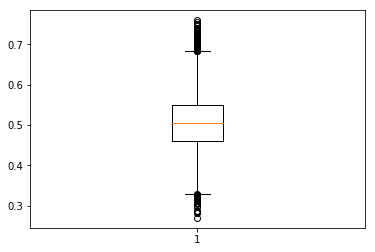

In [64]:
# Creating a box plot to detect outliers
plt.boxplot(df.EFGPerc)

In [65]:
# finding IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

PTS        18.000000
FGM         7.000000
FGA        10.000000
FGPerc      7.400000
3PM         5.000000
3PA        10.000000
3PPerc     13.100000
FTM         8.000000
FTA        10.000000
FTPerc     14.100000
OREB        5.000000
DREB        8.000000
REB         9.000000
AST         7.000000
STL         4.000000
BLK         3.000000
TOV         5.000000
PF          6.000000
EFGPerc     0.088462
FTR         0.129167
dtype: float64


In [67]:
# define upper bound
upper = Q3 + 1.5 * IQR
# define lower bound 
lower = Q1 - 1.5 * IQR
# define outlier variable 
# below is equivalent to this formula: outlier = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
outlier = (df < lower) | (df > upper)

# print out the results
# gives the location of the outlier values (indicated by True) based on the bounds defined above 
print(outlier)

         PTS    FGM    FGA  FGPerc    3PM    3PA  3PPerc    FTM    FTA  \
0      False  False  False   False  False  False   False  False  False   
1      False  False  False   False  False  False   False  False  False   
2      False  False  False   False  False  False   False  False  False   
3      False  False  False   False  False  False   False  False  False   
4      False  False  False   False  False  False   False  False  False   
5      False  False  False   False  False  False   False  False  False   
6      False  False  False   False  False  False   False  False  False   
7      False  False  False   False  False  False   False  False  False   
8      False  False  False   False  False  False   False  False  False   
9      False  False  False   False  False  False   False  False  False   
10     False  False  False   False  False  False   False  False  False   
11     False  False  False   False  False  False   False  False  False   
12     False  False  False   False  Fa

In [68]:
# define upper and lower lists
upper = []
lower = []

# create for loop that will iterate over each value in every column
for i in df.columns:
    # define Q1 and Q3 for each column
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    # define IQR for each column
    IQR = Q3 - Q1
    # append empty lists upper and lower
    upper_list = Q3 + 1.5 * IQR
    upper.append(upper_list)
    lower_list = Q1 - 1.5 * IQR
    lower.append(lower_list)

In [69]:
# define the function that will replace outlier values in each column with the appropriate upper or lower limit 
def outlier_handling(x, upper, lower):
    if x > upper:
        x = upper
    elif x < lower:
            x = lower
    else:
        pass
    return x

In [70]:
# apply the outlier handling function to the df dataframe to replace the outlier values in each column
for col in df.columns:
    q1 = df.loc[:, col].quantile(0.25)
    q3 = df.loc[:, col].quantile(0.75)
    IQR = q3 - q1
    lbound = q1 - 1.5*IQR
    ubound = q3 + 1.5*IQR
    df.loc[:, col] = df.loc[:, col].apply(lambda x: outlier_handling(x, ubound,lbound))

## Going to check and see if worked

{'whiskers': [<matplotlib.lines.Line2D at 0x117105a58>,
 'caps': [<matplotlib.lines.Line2D at 0x11710e358>,
 'boxes': [<matplotlib.lines.Line2D at 0x117105908>],
 'medians': [<matplotlib.lines.Line2D at 0x11710eba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x11710efd0>],
 'means': []}

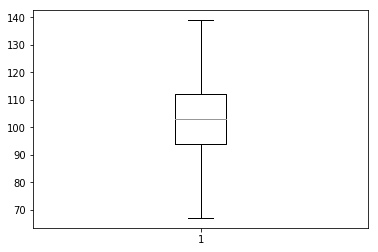

In [72]:
# Creating a box plot to detect outliers
plt.boxplot(df.PTS)

{'whiskers': [<matplotlib.lines.Line2D at 0x11647a390>,
 'caps': [<matplotlib.lines.Line2D at 0x11647ac50>,
 'boxes': [<matplotlib.lines.Line2D at 0x11647a240>],
 'medians': [<matplotlib.lines.Line2D at 0x1164844e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x116484908>],
 'means': []}

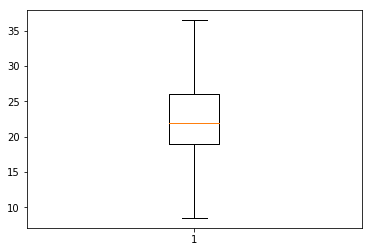

In [73]:
# Creating a box plot to detect outliers
plt.boxplot(df.AST)

{'whiskers': [<matplotlib.lines.Line2D at 0x1164d32b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1164d3b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1164d3160>],
 'medians': [<matplotlib.lines.Line2D at 0x1164db400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1164db828>],
 'means': []}

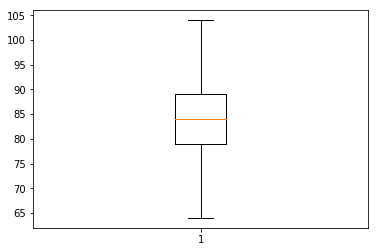

In [74]:
# Creating a box plot to detect outliers
plt.boxplot(df.FGA)

{'whiskers': [<matplotlib.lines.Line2D at 0x1165f0048>,
 'caps': [<matplotlib.lines.Line2D at 0x1165f0908>,
 'boxes': [<matplotlib.lines.Line2D at 0x1165e4eb8>],
 'medians': [<matplotlib.lines.Line2D at 0x1165f8198>],
 'fliers': [<matplotlib.lines.Line2D at 0x1165f85c0>],
 'means': []}

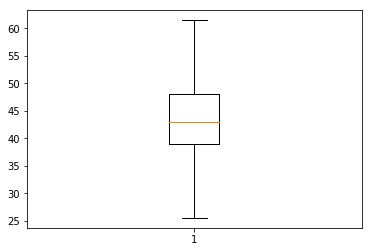

In [75]:
# Creating a box plot to detect outliers
plt.boxplot(df.REB)

{'whiskers': [<matplotlib.lines.Line2D at 0x1166468d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1166511d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x116646780>],
 'medians': [<matplotlib.lines.Line2D at 0x116651a20>],
 'fliers': [<matplotlib.lines.Line2D at 0x116651e48>],
 'means': []}

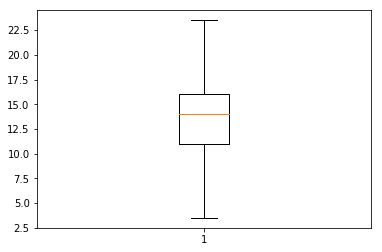

In [76]:
# Creating a box plot to detect outliers
plt.boxplot(df.TOV)

{'whiskers': [<matplotlib.lines.Line2D at 0x116d57278>,
 'caps': [<matplotlib.lines.Line2D at 0x116d57b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x116d57128>],
 'medians': [<matplotlib.lines.Line2D at 0x116d5e3c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x116d5e7f0>],
 'means': []}

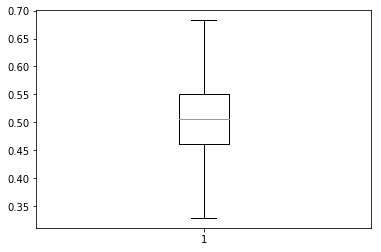

In [77]:
# Creating a box plot to detect outliers
plt.boxplot(df.EFGPerc)

## IT WORKED!!

In [78]:
# export new dataframe to csv
df.to_csv('../csv_files/Capstone_p1_iqr.csv')

In [79]:
# Saving Y (Target) to a csv
dfy.to_csv('../csv_files/TargetVariable_p1.csv')